In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/drug200.csv')

In [5]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [6]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [7]:
df.shape

(200, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [9]:
df.isnull().any()

Age            False
Sex            False
BP             False
Cholesterol    False
Na_to_K        False
Drug           False
dtype: bool

In [10]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [11]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [12]:
df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [13]:
df.Drug.unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [14]:
df.Age.unique()

array([23, 47, 28, 61, 22, 49, 41, 60, 43, 34, 74, 50, 16, 69, 32, 57, 63,
       48, 33, 31, 39, 45, 18, 65, 53, 46, 15, 73, 58, 66, 37, 68, 67, 62,
       24, 26, 40, 38, 29, 17, 54, 70, 36, 19, 64, 59, 51, 42, 56, 20, 72,
       35, 52, 55, 30, 21, 25])

In [15]:
df.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

<Axes: >

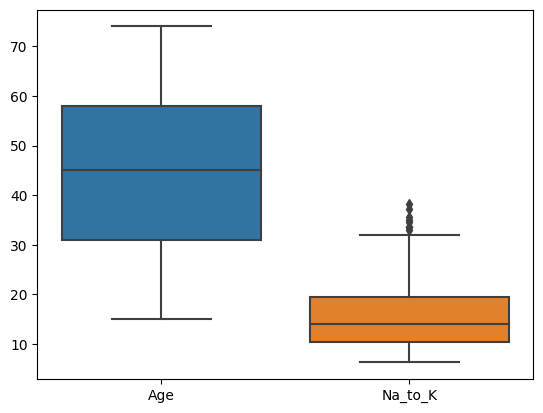

In [16]:
sns.boxplot(df)

In [17]:
# Na_to_K contains outliers
## Replace outliers using median method
q1 = df['Na_to_K'].quantile(.25)
q3 = df['Na_to_K'].quantile(.75)
IQR = q3 - q1
IQR

8.9345

In [18]:
upper_limit = q3+1.5*IQR
lower_limit = q1-1.5*IQR

In [19]:
df.median()

<ipython-input-19-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Age        45.0000
Na_to_K    13.9365
dtype: float64

In [20]:
df['Na_to_K'] =np.where(df['Na_to_K']>upper_limit,13.9365,df['Na_to_K'])

<Axes: >

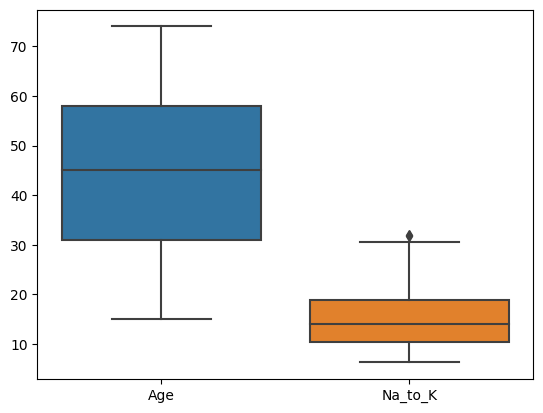

In [21]:
sns.boxplot(df)

In [22]:
df.corr()

<ipython-input-22-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Na_to_K
Age,1.000000,-0.057031
Na_to_K,-0.057031,1.000000


In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le = LabelEncoder()

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
x = df.iloc[:,0:5]
x.head(4)

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798


In [28]:
y = df['Drug']
y

0      DrugY
1      drugC
2      drugC
3      drugX
4      DrugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [29]:
x.shape, y.shape

((200, 5), (200,))

In [31]:
x['BP']=le.fit_transform(df['BP'])
x['BP']

0      0
1      1
2      1
3      2
4      1
      ..
195    1
196    1
197    2
198    2
199    1
Name: BP, Length: 200, dtype: int64

In [32]:
x['Cholesterol']=le.fit_transform(df['Cholesterol'])
x['Cholesterol']

0      0
1      0
2      0
3      0
4      0
      ..
195    0
196    0
197    0
198    1
199    1
Name: Cholesterol, Length: 200, dtype: int64

In [33]:
x['Sex']=le.fit_transform(df['Sex'])
x['Sex']

0      0
1      1
2      1
3      0
4      0
      ..
195    0
196    1
197    1
198    1
199    0
Name: Sex, Length: 200, dtype: int64

In [34]:
y=le.fit_transform(y)
y

array([0, 3, 3, 4, 0, 4, 0, 3, 0, 0, 3, 0, 0, 0, 4, 0, 4, 1, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 0, 0, 4, 2, 4, 0, 4, 4, 1, 4, 4, 4, 0, 2, 0, 4,
       4, 4, 1, 3, 0, 0, 0, 4, 0, 0, 2, 3, 2, 0, 4, 0, 0, 1, 0, 4, 2, 0,
       1, 4, 0, 0, 2, 0, 4, 0, 0, 0, 1, 0, 1, 4, 2, 4, 3, 1, 3, 2, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 1, 3, 4, 0, 4, 4, 0, 2, 0,
       1, 4, 4, 4, 4, 0, 4, 4, 1, 0, 0, 0, 0, 0, 2, 0, 0, 4, 0, 4, 0, 0,
       4, 0, 0, 4, 2, 1, 2, 4, 1, 0, 2, 0, 1, 4, 4, 1, 4, 3, 1, 2, 4, 4,
       0, 3, 1, 0, 3, 4, 4, 2, 4, 0, 0, 0, 0, 4, 0, 1, 4, 4, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 4, 4, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 3, 0, 3, 3, 4,
       4, 4])

In [35]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=12)

In [36]:
xtrain.shape, xtest.shape

((160, 5), (40, 5))

In [37]:
ytrain.shape, ytest.shape

((160,), (40,))

In [38]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [39]:
x.dtypes

Age              int64
Sex              int64
BP               int64
Cholesterol      int64
Na_to_K        float64
dtype: object

In [40]:
y.dtype

dtype('int64')

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.fit_transform(xtest)

In [42]:
ytrain = keras.utils.to_categorical(ytrain)
ytest = keras.utils.to_categorical(ytest)

In [46]:
# Initializing the seq model
reg_model = Sequential()
# Adding the input layer to the model
reg_model.add(Dense(48, input_dim=5,activation='relu'))
# Adding the 1st hidden layer to the model
reg_model.add(Dense(36,activation='relu'))
# Adding the 2nd hidden layer to the model
reg_model.add(Dense(24,activation='relu'))
# Adding the 3rd hidden layer to the model
reg_model.add(Dense(12,activation='relu'))
# Adding output layer
reg_model.add(Dense(5,activation='softmax'))

In [47]:
reg_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
reg_model.fit(xtrain, ytrain, epochs=48, batch_size=6)

Epoch 1/48
27/27 [==============================] - 1s 2ms/step - loss: 1.4913 - accuracy: 0.4125 
Epoch 2/48
27/27 [==============================] - 0s 2ms/step - loss: 1.2356 - accuracy: 0.6125
Epoch 3/48
27/27 [==============================] - 0s 2ms/step - loss: 1.0117 - accuracy: 0.5750
Epoch 4/48
27/27 [==============================] - 0s 2ms/step - loss: 0.8052 - accuracy: 0.6750
Epoch 5/48
27/27 [==============================] - 0s 2ms/step - loss: 0.6300 - accuracy: 0.7250
Epoch 6/48
27/27 [==============================] - 0s 2ms/step - loss: 0.4978 - accuracy: 0.8250
Epoch 7/48
27/27 [==============================] - 0s 2ms/step - loss: 0.4011 - accuracy: 0.8750
Epoch 8/48
27/27 [==============================] - 0s 3ms/step - loss: 0.3356 - accuracy: 0.9187
Epoch 9/48
27/27 [==============================] - 0s 3ms/step - loss: 0.2811 - accuracy: 0.9000
Epoch 10/48
27/27 [==============================] - 0s 2ms/step - loss: 0.2610 - accuracy: 0.9125
Epoch 11/48
27/27 

In [49]:
test_loss, test_acc = reg_model.evaluate(xtest, ytest)
print('Test accuracy:', test_acc * 100)

2/2 [==============================] - 0s 10ms/step - loss: 0.3666 - accuracy: 0.8750
Test accuracy: 87.5


In [50]:
#Task 3 : Test the model with random data

In [51]:
ypred = reg_model.predict([[0.87,0.52,0.74,0.71,0.03]])
print(ypred)
ypred = np.argmax(ypred)
ypred

1/1 [==============================] - 0s 191ms/step
[[9.9222082e-01 5.7370436e-14 2.9056558e-11 5.5959482e-08 7.7791074e-03]]


0

In [54]:
random_data=np.random.rand(1,5)
ypred = reg_model.predict(random_data)
print(ypred)
ypred = np.argmax(ypred)
output = ['drugA','drugB','drugC','drugX','DrugY']
output[ypred]

1/1 [==============================] - 0s 38ms/step
[[1.0000000e+00 9.0938822e-18 2.0685557e-11 1.1385658e-13 2.7982889e-09]]


'drugA'